In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('tableau-colorblind10')
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler, LabelEncoder

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


## Check Null Values

In [4]:
df_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [5]:
df_train.loc[df_train['Last_achievement_%'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [6]:
df_train.loc[df_train['Achievement_above_100%_during3quartal'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [7]:
df_train.dropna(inplace=True)

## Checking Proportion Y lable

In [8]:
df_train['Best Performance'].value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

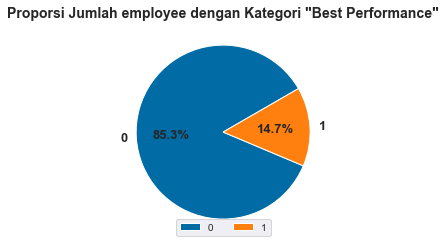

In [9]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Manipulate `GPA` Column

In [10]:
normal_gpa = df_train[(df_train['GPA']<=4.00) & (df_train['GPA']>0.5)]
normal_gpa['GPA'].describe()

count    8951.000000
mean        3.160937
std         0.242433
min         2.000000
25%         3.000000
50%         3.140000
75%         3.310000
max         3.970000
Name: GPA, dtype: float64

In [11]:
wrong_gpa = df_train[(df_train['GPA']>4.00) | (df_train['GPA']<0.5)]
wrong_gpa['GPA'].describe()

count    2201.000000
mean        3.238378
std        29.989234
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       378.000000
Name: GPA, dtype: float64

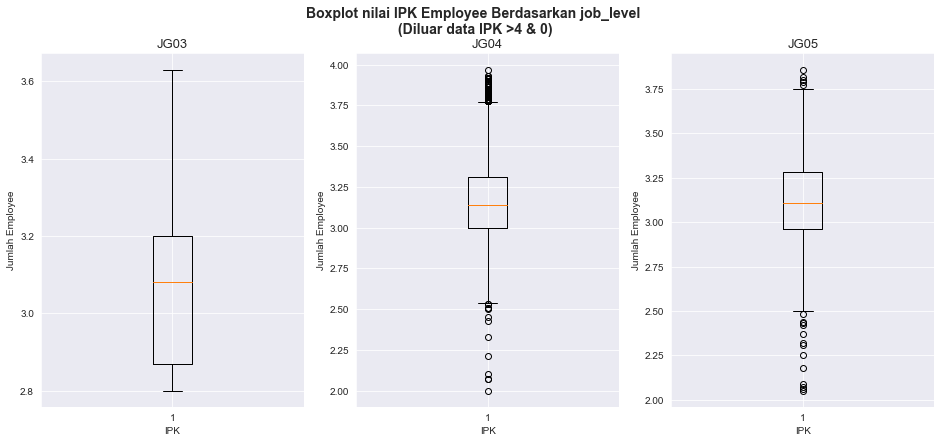

In [12]:
JG = ['JG03','JG04','JG05']

plt.figure(figsize=(16,6.5))
plt.suptitle('Boxplot nilai IPK Employee Berdasarkan job_level\n (Diluar data IPK >4 & 0)', fontsize=14, fontweight='bold')
for x in range(len(JG)) :
    plt.subplot(1,3,x+1)
    plt.title('JG0'+str(3+x), fontsize=13)
    plt.boxplot(normal_gpa[normal_gpa['job_level']==JG[x]]['GPA'])
    plt.xlabel('IPK')
    plt.ylabel('Jumlah Employee')

In [13]:
jg03_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG03']['GPA']
jg03_normal_gpa.describe()

count    29.000000
mean      3.095172
std       0.232389
min       2.800000
25%       2.870000
50%       3.080000
75%       3.200000
max       3.630000
Name: GPA, dtype: float64

In [14]:
jg04_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG04']['GPA']
jg04_normal_gpa.describe()

count    8413.000000
mean        3.164201
std         0.239812
min         2.000000
25%         3.000000
50%         3.140000
75%         3.310000
max         3.970000
Name: GPA, dtype: float64

In [15]:
jg05_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG05']['GPA']
jg05_normal_gpa.describe()

count    509.000000
mean       3.110747
std        0.277930
min        2.050000
25%        2.960000
50%        3.110000
75%        3.280000
max        3.860000
Name: GPA, dtype: float64

In [16]:
wrong_gpa[wrong_gpa['job_level']=='JG03']['GPA']

2167    0.0
2572    0.0
2624    0.0
4258    0.0
5365    0.0
7426    0.0
7898    0.0
Name: GPA, dtype: float64

In [17]:
def fixing_gpa(x):
    jg = x[0]
    gpa = x[1]
    
    if gpa > 4.00 or gpa < 0.50:
        if jg == 'JG03':
            return 3.08
        elif jg == 'JG04':
            return 3.14
        elif jg == 'JG05':
            return 3.11
    else:
        return gpa

In [18]:
df_train['GPA'] = df_train[['job_level','GPA']].apply(fixing_gpa,axis=1)

In [19]:
df_train[df_train['job_level']=='JG03']['GPA']

386      3.26
401      2.99
820      3.00
845      2.80
1184     2.80
1270     2.85
1337     2.87
1589     3.34
1754     3.15
1879     2.81
1890     3.13
1978     2.95
2167     3.08
2503     3.20
2572     3.08
2624     3.08
2948     3.18
2999     3.34
3016     3.07
3557     2.80
3569     3.63
4258     3.08
5137     3.00
5290     3.53
5365     3.08
5392     2.87
6961     3.11
7426     3.08
7898     3.08
7953     3.09
8688     3.50
8711     3.08
8777     3.07
9061     3.33
10072    2.81
11074    3.20
Name: GPA, dtype: float64

## Manipulate `age` column

In [20]:
df_train['age']

0        1985
1        1989
2        1970
3        1967
4        1965
         ... 
11148    1986
11149    1988
11150    1991
11151    1987
11152    1980
Name: age, Length: 11152, dtype: int64

In [21]:
df_train['age_now'] = 2021-df_train['age']

In [22]:
df_train['age_now'].describe()

count    11152.000000
mean        35.163379
std          4.632164
min         24.000000
25%         32.000000
50%         34.000000
75%         36.000000
max         58.000000
Name: age_now, dtype: float64

## Manipulate `year_graduate` column

In [23]:
df_train['year_graduated']

0        2011
1        2007
2        1989
3        1987
4        1985
         ... 
11148    2016
11149    2015
11150    2017
11151    2012
11152    2009
Name: year_graduated, Length: 11152, dtype: int64

In [24]:
df_train['year_since_graduated'] = 2021-df_train['year_graduated']

In [25]:
df_train['year_since_graduated'].describe()

count    11152.00000
mean        11.82613
std          4.11726
min          2.00000
25%          9.00000
50%         11.00000
75%         13.00000
max         39.00000
Name: year_since_graduated, dtype: float64

In [26]:
df_train.drop(['age', 'year_graduated'], axis=1, inplace=True)

In [27]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36


In [28]:
df_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'Best Performance', 'age_now',
       'year_since_graduated'],
      dtype='object')

In [29]:
df_train.shape

(11152, 22)

## Manipulate `Best Performance`

In [30]:
df_train1 = df_train.copy()

### `Best Performance`

In [31]:
best_employee = df_train1[(df_train1['Last_achievement_%']>=100.00) & (df_train1['Achievement_above_100%_during3quartal']==3)]
best_employee

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
46,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,Y,2,level_1,...,3,3,2,3,1,121.61,3.0,0,33,15
48,JG04,1.606238,PG03,1.606238,1.039230,RM_type_A,2,Y,2,level_1,...,3,2,5,10,0,105.86,3.0,0,45,26
51,JG05,2.828427,PG06,2.828427,1.824829,RM_type_A,1,Y,2,level_1,...,7,8,0,8,3,109.30,3.0,0,52,33
52,JG05,2.828427,PG06,2.345208,1.224745,RM_type_A,2,Y,1,level_1,...,7,6,0,0,0,101.21,3.0,1,47,28
61,JG05,2.828427,PG06,2.236068,0.707107,RM_type_A,2,Y,2,level_1,...,12,6,3,3,2,101.44,3.0,0,46,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,JG05,1.081665,PG05,1.081665,1.224745,RM_type_A,1,Y,2,level_5,...,11,8,1,0,2,110.57,3.0,0,49,12
11130,JG04,1.385641,PG03,1.385641,2.179449,RM_type_C,2,N,0,level_5,...,2,3,3,6,0,106.18,3.0,0,32,4
11132,JG04,1.658312,PG03,1.658312,0.707107,RM_type_A,2,N,0,level_5,...,2,4,0,4,0,106.85,3.0,0,33,7
11133,JG04,1.385641,PG03,1.385641,1.118034,RM_type_A,2,Y,2,level_5,...,4,4,3,3,7,104.69,3.0,1,39,11


In [32]:
best_employee['Best Performance'].value_counts()

0    901
1    140
Name: Best Performance, dtype: int64

In [33]:
# Convert 0 to 1
best_employee['Best Performance'] = best_employee['Best Performance'].map({0:1,1:1})

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
best_employee['Best Performance'].value_counts()

1    1041
Name: Best Performance, dtype: int64

In [35]:
best_employee.index

Int64Index([   46,    48,    51,    52,    61,    65,    67,    92,    96,
              117,
            ...
            10993, 11005, 11009, 11011, 11041, 11118, 11130, 11132, 11133,
            11145],
           dtype='int64', length=1041)

In [36]:
df_train1.loc[best_employee.index,'Best Performance'] = best_employee['Best Performance']

In [37]:
df_train1.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36


In [38]:
df_train1['Best Performance'].unique()

array([0, 1], dtype=int64)

In [39]:
df_train1['Best Performance'].value_counts()

0    8614
1    2538
Name: Best Performance, dtype: int64

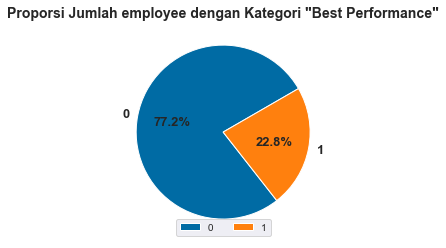

In [40]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train1['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train1['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

### `Not Best Performance`

In [41]:
# not_best_employee = df_train1[(df_train1['Last_achievement_%']<100.00) & (df_train1['Achievement_above_100%_during3quartal']==0)]
# not_best_employee.head()

In [42]:
not_best_employee = df_train1[(df_train1['Last_achievement_%']<100.00) & (df_train1['Achievement_above_100%_during3quartal']==0)]
not_best_employee.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36


In [43]:
len(not_best_employee)

7597

In [44]:
not_best_employee['Best Performance'].value_counts()

0    6457
1    1140
Name: Best Performance, dtype: int64

In [45]:
not_best_employee['Last_achievement_%'].describe()

count    7597.000000
mean       60.714025
std        16.375521
min         4.510000
25%        51.390000
50%        63.070000
75%        73.280000
max        85.000000
Name: Last_achievement_%, dtype: float64

In [46]:
not_best_employee['Achievement_above_100%_during3quartal'].describe()

count    7597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Achievement_above_100%_during3quartal, dtype: float64

In [47]:
not_best_employee['Best Performance'].unique()

array([0, 1], dtype=int64)

In [48]:
# We have 1140 employees who have Last achievement below 100.00 & never achived above 100% during last 3 years
not_best_employee['Best Performance'].value_counts()
# these data seemed quite odd. they should be considered as not Best Performance

0    6457
1    1140
Name: Best Performance, dtype: int64

In [49]:
# Convert 1 to 0
not_best_employee['Best Performance'] = not_best_employee['Best Performance'].map({0:0,1:0})

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
not_best_employee['Best Performance'].unique()

array([0], dtype=int64)

In [51]:
not_best_employee['Best Performance'].value_counts()

0    7597
Name: Best Performance, dtype: int64

In [52]:
df_train1.loc[not_best_employee.index,'Best Performance'] = not_best_employee['Best Performance']

In [53]:
df_train1

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,0,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,Y,1,level_5,...,3,3,0,4,1,50.87,0.0,0,35,5
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,Y,2,level_5,...,1,2,0,6,0,79.91,0.0,0,33,6
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,Y,0,level_5,...,1,2,0,4,0,78.38,0.0,0,30,4
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,Y,1,level_5,...,5,4,0,4,1,85.94,1.0,0,34,9


In [54]:
df_train1['Best Performance'].unique()

array([0, 1], dtype=int64)

In [55]:
df_train1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

In [56]:
#Check
print(not_best_employee['Last_achievement_%'].describe())
print()
print(not_best_employee['Achievement_above_100%_during3quartal'].describe())

count    7597.000000
mean       60.714025
std        16.375521
min         4.510000
25%        51.390000
50%        63.070000
75%        73.280000
max        85.000000
Name: Last_achievement_%, dtype: float64

count    7597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Achievement_above_100%_during3quartal, dtype: float64


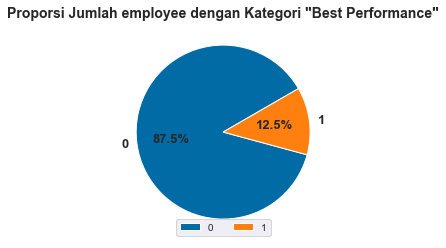

In [57]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train1['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train1['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

In [58]:
#Checking

In [59]:
df_train1[df_train1['Last_achievement_%']>=100.00]['Best Performance'].value_counts()

1    1085
0     367
Name: Best Performance, dtype: int64

In [60]:
df_train1[df_train1['Achievement_above_100%_during3quartal']==3]['Best Performance'].value_counts()

1    1143
0     461
Name: Best Performance, dtype: int64

In [61]:
df_train1[(df_train1['Last_achievement_%']>=100.00)|(df_train1['Achievement_above_100%_during3quartal']<3)]['Best Performance'].value_counts()

0    9293
1    1296
Name: Best Performance, dtype: int64

In [62]:
df_train1[(df_train1['Last_achievement_%']<100.00)|(df_train1['Achievement_above_100%_during3quartal']<3)]['Best Performance'].value_counts()

0    9754
1     357
Name: Best Performance, dtype: int64

In [63]:
df_train1[df_train1['Last_achievement_%']<100.00]['Best Performance'].value_counts()

0    9387
1     313
Name: Best Performance, dtype: int64

In [64]:
df_train1[df_train1['Achievement_above_100%_during3quartal']<3]['Best Performance'].value_counts()

0    9293
1     255
Name: Best Performance, dtype: int64

In [65]:
df_train1['Best Performance'].unique()

array([0, 1], dtype=int64)

In [66]:
df_train1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

In [67]:
#For Employee who has Last Achievement below 100%
df_train1[df_train1['Last_achievement_%']<100.00]['Best Performance'].value_counts()

0    9387
1     313
Name: Best Performance, dtype: int64

In [68]:
#For Employee who has Last Achievement below 100% but considered as 'Best Performance'
achv = df_train1[df_train1['Last_achievement_%']<100.00]
achv[achv['Best Performance']==1]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
33,JG04,1.224745,PG03,1.224745,1.118034,RM_type_B,2,Y,1,level_1,...,2,2,0,2,0,97.30,1.0,1,32,14
43,JG05,2.692582,PG06,2.345208,1.191638,RM_type_A,2,Y,2,level_1,...,9,7,0,2,0,88.32,1.0,1,54,34
47,JG05,2.828427,PG06,2.345208,0.911043,RM_type_A,2,Y,2,level_1,...,9,7,1,3,0,99.97,2.0,1,55,36
60,JG05,1.634013,PG06,0.000000,1.224745,RM_type_A,1,Y,3,level_1,...,14,9,1,2,0,98.86,3.0,1,53,34
87,JG05,2.828427,PG06,2.345208,0.707107,RM_type_A,2,Y,2,level_1,...,5,7,9,6,1,95.78,2.0,1,55,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,JG04,1.322876,PG03,1.322876,0.707107,RM_type_A,2,Y,1,level_4,...,3,4,8,0,3,45.50,1.0,1,35,9
11097,JG04,1.385641,PG03,1.385641,0.412311,RM_type_A,2,Y,1,level_4,...,4,5,0,2,0,77.69,1.0,1,39,14
11120,JG04,2.465766,PG04,1.732051,0.000000,RM_type_C,1,Y,1,level_5,...,11,8,0,12,14,65.13,1.0,1,39,11
11128,JG04,1.555635,PG03,1.555635,1.870829,RM_type_A,2,Y,1,level_5,...,3,2,0,3,0,91.43,3.0,1,39,9


In [69]:
# Checking achivemet last 3 years for Employee who has Last Achievement below 100% but considered as 'Best Performance'
achv[achv['Best Performance']==1]['Achievement_above_100%_during3quartal'].value_counts()
#Still Possible

1.0    135
3.0    102
2.0     76
Name: Achievement_above_100%_during3quartal, dtype: int64

In [70]:
# Employee who has not ever achived above 100% during last 3 years
df_train1[df_train1['Achievement_above_100%_during3quartal']==0]['Best Performance'].value_counts()
# Its Logic, impossible for employee with this category considered as Best Performance.
# Its logic to considered this as Non Best Performer because they never achieved KPI even for a 1 year

0    7597
Name: Best Performance, dtype: int64

In [71]:
df_train1[(df_train1['Last_achievement_%']<100.00)&(df_train1['Achievement_above_100%_during3quartal']==0)]['Best Performance'].value_counts()

0    7597
Name: Best Performance, dtype: int64

In [72]:
df_train1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

## Label encoder

In [73]:
# le=LabelEncoder()

**`job_level`**

In [74]:
df_train1['job_level'] = df_train1['job_level'].map({'JG03':1, 'JG04':2, 'JG05':3})

**`person_level`**

In [75]:
df_train1['person_level'] = df_train1['person_level'].map({'PG01':1,'PG02':2,'PG03':3, 'PG04':4, 
                                                          'PG05':5,'PG06':6,'PG07':7, 'PG08':8})

**`Education_level`**

In [76]:
df_train1['Education_level'] = df_train1['Education_level'].map({'level_0':1,'level_1':2,'level_2':3, 
                                                              'level_3':4, 'level_4':5, 'level_5':6})

**`Employee_type`**

In [77]:
# df_train1['Employee_type'] = df_train1['Employee_type'].map({'RM_type_A':3, 'RM_type_B':2, 'RM_type_C':1})

## Dummy

In [78]:
gender = pd.get_dummies(df_train1['gender'])
marital = pd.get_dummies(df_train1['marital_status_maried(Y/N)'])
emp_type = pd.get_dummies(df_train1['Employee_type'])
dummy1 = pd.concat([gender,marital,emp_type], axis=1)
dummy1

,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C
0,0,1,0,1,1,0,0
1,0,1,0,1,1,0,0
2,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0
4,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...
11148,0,1,0,1,1,0,0
11149,1,0,0,1,0,1,0
11150,0,1,0,1,0,1,0
11151,1,0,0,1,1,0,0


In [79]:
df_temp = df_train1.drop(['gender','marital_status_maried(Y/N)', 'Employee_type', 'Best Performance'], axis=1)

In [80]:
df_temp.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.352775,3,1.352775,1.732051,1,1,2.86,4,2,3,2,3,0,46.37,0.0,36,10
1,2,1.292285,3,1.292285,1.039230,0,2,3.14,4,4,3,0,0,1,47.68,0.0,32,14
2,3,2.565151,6,2.308679,1.780449,1,2,3.11,28,10,9,6,2,1,40.73,0.0,51,32
3,3,2.828427,6,1.000000,1.385641,2,2,3.11,29,11,6,0,4,10,47.42,0.0,54,34
4,3,2.828427,6,2.828427,0.707107,3,2,3.11,30,9,8,2,3,0,47.18,0.0,56,36


In [81]:
df_temp.shape

(11152, 18)

## Concatinate `df_temp` and `dummy`

In [82]:
data1 = pd.concat([df_temp,dummy1,df_train1['Best Performance']],axis=1)
data1

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,...,age_now,year_since_graduated,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C,Best Performance
0,2,1.352775,3,1.352775,1.732051,1,1,2.86,4,2,...,36,10,0,1,0,1,1,0,0,0
1,2,1.292285,3,1.292285,1.039230,0,2,3.14,4,4,...,32,14,0,1,0,1,1,0,0,0
2,3,2.565151,6,2.308679,1.780449,1,2,3.11,28,10,...,51,32,1,0,0,1,0,0,1,0
3,3,2.828427,6,1.000000,1.385641,2,2,3.11,29,11,...,54,34,0,1,0,1,1,0,0,0
4,3,2.828427,6,2.828427,0.707107,3,2,3.11,30,9,...,56,36,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,2,1.256981,3,1.256981,1.224745,1,6,3.33,4,3,...,35,5,0,1,0,1,1,0,0,0
11149,2,1.385641,3,1.385641,1.802776,2,6,3.00,3,1,...,33,6,1,0,0,1,0,1,0,0
11150,2,1.256981,3,1.256981,1.385641,0,6,3.48,2,1,...,30,4,0,1,0,1,0,1,0,0
11151,2,1.118034,3,1.118034,0.000000,1,6,3.53,5,5,...,34,9,1,0,0,1,1,0,0,0


In [83]:
data1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

## Checking data again

In [84]:
data1.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
number_of_dependences                    0
Education_level                          0
GPA                                      0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
age_now                                  0
year_since_graduated                     0
1                                        0
2                                        0
N                                        0
Y                                        0
RM_type_A                                0
RM_type_B  

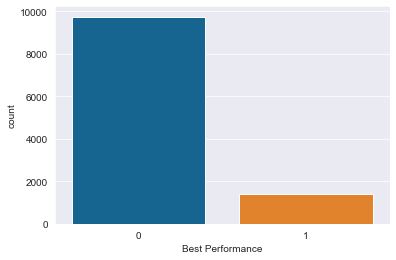

In [85]:
sns.countplot(data1['Best Performance'])

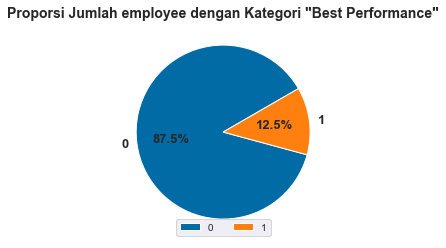

In [86]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(data1['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=data1['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Correlation

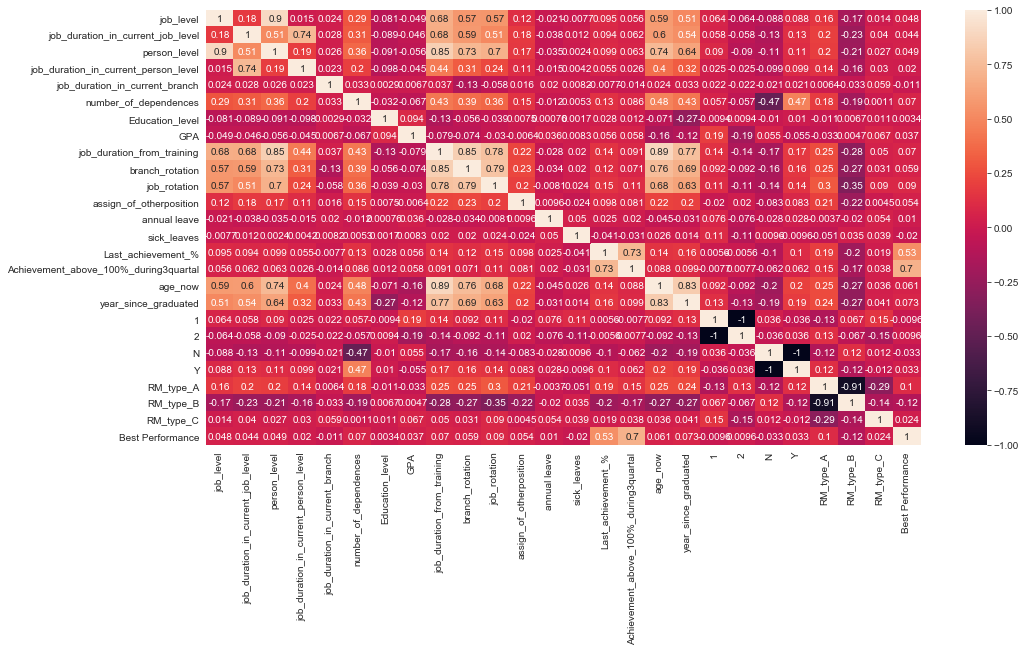

In [87]:
plt.figure(figsize=(16,8))
sns.heatmap(data1.corr(),annot=True)

In [88]:
data1.corr()['Best Performance'].sort_values(ascending=False)

Best Performance                         1.000000
Achievement_above_100%_during3quartal    0.695677
Last_achievement_%                       0.532591
RM_type_A                                0.101649
job_rotation                             0.089856
year_since_graduated                     0.073476
job_duration_from_training               0.070169
number_of_dependences                    0.069508
age_now                                  0.061364
branch_rotation                          0.058612
assign_of_otherposition                  0.053994
person_level                             0.049140
job_level                                0.047841
job_duration_in_current_job_level        0.043679
GPA                                      0.037306
Y                                        0.032763
RM_type_C                                0.023976
job_duration_in_current_person_level     0.020428
annual leave                             0.010321
2                                        0.009554


In [89]:
df_train1[df_train1['Achievement_above_100%_during3quartal']<3]['Best Performance'].value_counts()

0    9293
1     255
Name: Best Performance, dtype: int64

In [90]:
df_train1[df_train1['Last_achievement_%']<100]['Best Performance'].value_counts()

0    9387
1     313
Name: Best Performance, dtype: int64

## Statsmodels

In [91]:
# sm_log = sm.Logit(data1['Best Performance'], sm.add_constant(data1.drop('Best Performance', axis=1)))
# result = sm_log.fit()
# print(result.summary())

## Checking imbalanced data

In [92]:
data1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

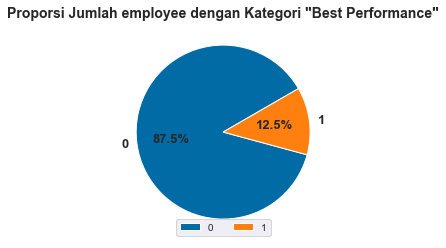

In [93]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(data1['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=data1['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Oversampling Dataset

In [94]:
X = data1.drop('Best Performance', axis=1)
y = data1['Best Performance']

In [95]:
print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (11152, 25)
y shape : (11152,)


In [96]:
y.value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

In [97]:
smot = SMOTE()
X_os, y_os = smot.fit_resample(X,y)

In [98]:
print(f'X Over Sampling shape : {X_os.shape}')
print(f'y Over Sampling shape : {y_os.shape}')

X Over Sampling shape : (19508, 25)
y Over Sampling shape : (19508,)


## Split Dataset

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X_os, y_os, test_size=0.25, random_state=42)

In [100]:
print(X_train.shape)
print(y_train.shape)

(14631, 25)
(14631,)


In [101]:
print(X_test.shape)
print(y_test.shape)

(4877, 25)
(4877,)


In [102]:
y_test.value_counts()

1    2447
0    2430
Name: Best Performance, dtype: int64

## Modelling

### Logistic Regression

In [103]:
logreg = LogisticRegression(solver='newton-cg')

In [104]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
pred_logreg = logreg.predict(X_test)
pred_logreg

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [106]:
proba_logreg = logreg.predict_proba(X_test)
proba_logreg

array([[2.28321447e-05, 9.99977168e-01],
       [9.81473616e-01, 1.85263839e-02],
       [5.43572680e-01, 4.56427320e-01],
       ...,
       [9.96082316e-01, 3.91768412e-03],
       [9.84203056e-01, 1.57969440e-02],
       [1.25238989e-01, 8.74761011e-01]])

In [107]:
logreg.coef_

array([[-3.35527852e-01, -2.08658064e-01, -4.08924468e-01,
        -6.38828046e-02,  4.05683100e-02, -1.23717167e-01,
        -3.09678516e-01, -3.26998860e-01,  1.31021042e-01,
        -2.71600243e-02,  8.28263061e-03, -2.11063810e-02,
        -5.72513259e-02, -5.69883167e-02,  4.92653454e-02,
         1.49355741e+00, -4.51927198e-02, -2.48708435e-03,
        -4.81817839e+00, -4.34154979e+00, -4.16302306e+00,
        -3.54276186e+00, -3.85412028e+00, -4.50234004e+00,
        -4.42671719e+00]])

In [108]:
coef_logreg = pd.DataFrame(logreg.coef_[0], index=X_train.columns, columns=['Coef']).sort_values('Coef',ascending=False)
coef_logreg

,Coef
Achievement_above_100%_during3quartal,1.493557
job_duration_from_training,0.131021
Last_achievement_%,0.049265
job_duration_in_current_branch,0.040568
job_rotation,0.008283
year_since_graduated,-0.002487
assign_of_otherposition,-0.021106
branch_rotation,-0.027160
age_now,-0.045193
sick_leaves,-0.056988


In [109]:
print(confusion_matrix(y_test,pred_logreg))

[[2208  222]
 [ 142 2305]]


<Figure size 432x432 with 0 Axes>

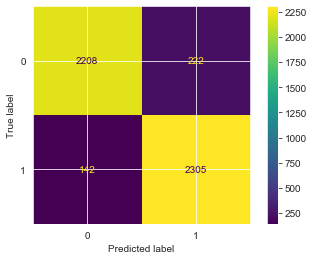

In [110]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(logreg,X_test,y_test, values_format='d')
plt.show()

In [111]:
print(classification_report(y_test,pred_logreg))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2430
           1       0.91      0.94      0.93      2447

    accuracy                           0.93      4877
   macro avg       0.93      0.93      0.93      4877
weighted avg       0.93      0.93      0.93      4877



In [112]:
cv_score = cross_val_score(logreg,X_test,y_test, cv=10, scoring='accuracy')

In [113]:
cv_score

array([0.92008197, 0.92008197, 0.93032787, 0.93237705, 0.94262295,
       0.91803279, 0.93852459, 0.9301848 , 0.90143737, 0.92197125])

In [114]:
cv_score.mean()

0.9255642609485978

In [115]:
proba_best = proba_logreg[:,1]
fpr, tpr, threshold = roc_curve(y_test, proba_best)
roc_auc_logreg = auc(fpr,tpr)

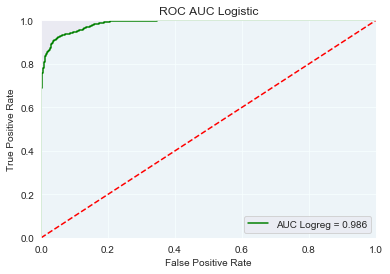

In [116]:
plt.title('ROC AUC Logistic')
plt.plot(fpr, tpr, 'green', label='AUC Logreg = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

### Random Forest

In [117]:
rfc = RandomForestClassifier()

In [118]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
pred_rfc = rfc.predict(X_test)
pred_rfc

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [120]:
proba_rfc = rfc.predict_proba(X_test)
proba_rfc

array([[0.01, 0.99],
       [1.  , 0.  ],
       [0.89, 0.11],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ]])

In [121]:
print(confusion_matrix(y_test,pred_rfc))

[[2392   38]
 [  54 2393]]


<Figure size 432x432 with 0 Axes>

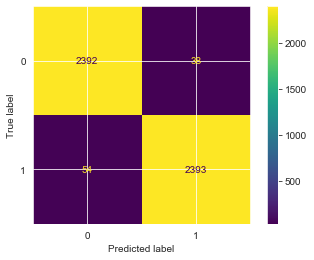

In [122]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfc,X_test,y_test, values_format='d')
plt.show()

In [123]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2430
           1       0.98      0.98      0.98      2447

    accuracy                           0.98      4877
   macro avg       0.98      0.98      0.98      4877
weighted avg       0.98      0.98      0.98      4877



In [124]:
cv_score_rfc = cross_val_score(rfc,X_test,y_test, cv=10, scoring='accuracy')

In [125]:
cv_score_rfc

array([0.97540984, 0.96106557, 0.96721311, 0.98565574, 0.97745902,
       0.97336066, 0.98155738, 0.9650924 , 0.96714579, 0.97535934])

In [126]:
cv_score_rfc.mean()

0.97293188474097

In [127]:
proba_best_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, proba_best_rfc)
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)

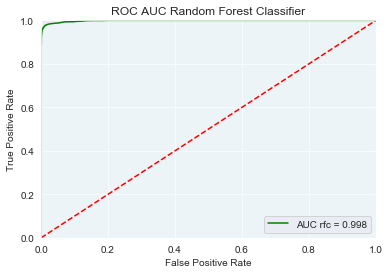

In [128]:
plt.title('ROC AUC Random Forest Classifier')
plt.plot(fpr_rfc, tpr_rfc, 'green', label='AUC rfc = {}'.format(round(roc_auc_rfc,3)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

In [129]:
rfc_feat_imp = rfc.feature_importances_
df_rfc_feat_imp = pd.DataFrame(rfc_feat_imp, index=X_train.columns)
df_rfc_feat_imp = df_rfc_feat_imp.reset_index().rename(columns={'index':'feature',0:'importance'})
df_rfc_feat_imp = df_rfc_feat_imp.sort_values('importance', ascending=False)
df_rfc_feat_imp

,feature,importance
15,Achievement_above_100%_during3quartal,0.442471
14,Last_achievement_%,0.295335
4,job_duration_in_current_branch,0.040602
1,job_duration_in_current_job_level,0.028803
3,job_duration_in_current_person_level,0.023058
23,RM_type_B,0.019467
7,GPA,0.017948
19,2,0.012953
8,job_duration_from_training,0.012785
18,1,0.011785


### DATA TEST

In [130]:
test = pd.read_csv('test.csv')

In [131]:
df_test = test.copy()

In [132]:
df_test['job_level'].unique()

array(['JG04', 'JG05', 'JG03', 'JG06'], dtype=object)

**Fixing `GPA`, `age`, `year_graduated`**

In [133]:
df_test['GPA'] = df_test[['job_level','GPA']].apply(fixing_gpa,axis=1)

df_test['age_now'] = 2021-df_test['age']

df_test['year_since_graduated'] = 2021-df_test['year_graduated']

In [134]:
df_test.drop(['age', 'year_graduated'],axis=1, inplace=True)

**`label encoder`**

In [135]:
df_test['Education_level'].unique()

array(['level_3', 'level_4', 'level_1', 'level_5', 'level_0', 'level_2'],
      dtype=object)

In [136]:
df_test['job_level'] = df_test['job_level'].map({'JG03':1,'JG04':2,'JG05':3,'JG06':4})

df_test['person_level'] = df_test['person_level'].map({'PG01':1,'PG02':2,'PG03':3, 'PG04':4, 
                                                          'PG05':5,'PG06':6,'PG07':7, 'PG08':8})

df_test['Education_level'] = df_test['Education_level'].map({'level_0':1,'level_1':2,'level_2':3, 
                                                              'level_3':4, 'level_4':5, 'level_5':6})

# df_test['Employee_type'] = df_test['Employee_type'].map({'RM_type_A':3, 'RM_type_B':2, 'RM_type_C':1})

In [137]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.256981,3,1.256981,0.707107,RM_type_A,1,N,0,4,...,6,4,2,6,3,7,84.02,0.0,33,12
1,2,1.224745,3,1.224745,1.256981,RM_type_B,2,N,0,5,...,2,2,2,0,1,0,63.74,0.0,30,7
2,2,0.500000,3,0.500000,1.081665,RM_type_A,2,Y,1,5,...,4,2,2,0,2,1,88.19,1.0,32,10
3,2,1.256981,3,1.256981,1.802776,RM_type_A,2,Y,1,5,...,3,1,3,0,3,0,25.94,0.0,31,7
4,2,1.352775,3,1.352775,1.224745,RM_type_B,1,Y,0,5,...,5,3,2,0,3,0,82.32,0.0,36,14


In [138]:
df_test['job_level'].unique()

array([2, 3, 1, 4], dtype=int64)

**`Dummy`**

In [139]:
gender = pd.get_dummies(df_test['gender'])
marital = pd.get_dummies(df_test['marital_status_maried(Y/N)'])
emp_type = pd.get_dummies(df_test['Employee_type'])

In [140]:
dummy_test = pd.concat([gender,marital,emp_type], axis=1)
dummy_test

,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C
0,1,0,1,0,1,0,0
1,0,1,1,0,0,1,0
2,0,1,0,1,1,0,0
3,0,1,0,1,1,0,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
5995,0,1,0,1,0,1,0
5996,0,1,0,1,1,0,0
5997,0,1,0,1,1,0,0
5998,0,1,0,1,1,0,0


In [141]:
df_temp = df_test.drop(['gender','marital_status_maried(Y/N)', 'Employee_type'], axis=1)

In [142]:
df_temp.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.256981,3,1.256981,0.707107,0,4,3.08,6,4,2,6,3,7,84.02,0.0,33,12
1,2,1.224745,3,1.224745,1.256981,0,5,3.31,2,2,2,0,1,0,63.74,0.0,30,7
2,2,0.500000,3,0.500000,1.081665,1,5,3.44,4,2,2,0,2,1,88.19,1.0,32,10
3,2,1.256981,3,1.256981,1.802776,1,5,3.14,3,1,3,0,3,0,25.94,0.0,31,7
4,2,1.352775,3,1.352775,1.224745,0,5,3.34,5,3,2,0,3,0,82.32,0.0,36,14


In [143]:
df_temp.shape

(6000, 18)

## Concatinate `df` and `dummy`

In [144]:
data_test = pd.concat([df_temp,dummy_test],axis=1)
data_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,...,Achievement_above_100%_during3quartal,age_now,year_since_graduated,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C
0,2,1.256981,3,1.256981,0.707107,0,4,3.08,6,4,...,0.0,33,12,1,0,1,0,1,0,0
1,2,1.224745,3,1.224745,1.256981,0,5,3.31,2,2,...,0.0,30,7,0,1,1,0,0,1,0
2,2,0.500000,3,0.500000,1.081665,1,5,3.44,4,2,...,1.0,32,10,0,1,0,1,1,0,0
3,2,1.256981,3,1.256981,1.802776,1,5,3.14,3,1,...,0.0,31,7,0,1,0,1,1,0,0
4,2,1.352775,3,1.352775,1.224745,0,5,3.34,5,3,...,0.0,36,14,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2,1.292285,3,1.292285,0.707107,0,5,3.01,2,2,...,0.0,33,6,0,1,0,1,0,1,0
5996,2,1.352775,3,1.352775,1.581139,1,5,3.56,5,3,...,3.0,32,10,0,1,0,1,1,0,0
5997,2,1.385641,3,1.385641,1.224745,0,5,3.59,3,2,...,0.0,30,8,0,1,0,1,1,0,0
5998,3,1.385641,5,1.385641,0.648074,2,5,2.93,14,7,...,0.0,41,18,0,1,0,1,1,0,0


In [145]:
data_test.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
number_of_dependences                    0
Education_level                          0
GPA                                      0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
age_now                                  0
year_since_graduated                     0
1                                        0
2                                        0
N                                        0
Y                                        0
RM_type_A                                0
RM_type_B  

In [146]:
print(list(X_train.columns))

['job_level', 'job_duration_in_current_job_level', 'person_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'Education_level', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated', 1, 2, 'N', 'Y', 'RM_type_A', 'RM_type_B', 'RM_type_C']


In [147]:
print(list(data_test.columns))

['job_level', 'job_duration_in_current_job_level', 'person_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'Education_level', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated', 1, 2, 'N', 'Y', 'RM_type_A', 'RM_type_B', 'RM_type_C']


**Logistic Regression**

In [148]:
pred_res_logreg = logreg.predict(data_test)
pred_res_logreg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
pred_res_logreg.sum()

1105

In [150]:
proba_res_logreg = logreg.predict_proba(data_test)
proba_res_logreg

array([[9.82356487e-01, 1.76435134e-02],
       [9.94652504e-01, 5.34749564e-03],
       [7.65854579e-01, 2.34145421e-01],
       ...,
       [9.99334758e-01, 6.65242245e-04],
       [9.75180472e-01, 2.48195284e-02],
       [9.73834836e-01, 2.61651641e-02]])

In [151]:
final_res_logreg = proba_res_logreg[:,1]
df_result_logreg = pd.DataFrame(final_res_logreg, columns=['Best Performance'])
df_result_logreg.reset_index(inplace=True)

In [152]:
df_result_logreg

,index,Best Performance
0,0,0.017644
1,1,0.005347
2,2,0.234145
3,3,0.002822
4,4,0.014064
...,...,...
5995,5995,0.006023
5996,5996,0.835789
5997,5997,0.000665
5998,5998,0.024820


In [153]:
df_result_logreg.to_csv('Submission-Another_model_Logistic.csv', index=False)

**Random Forest Classifier**

In [154]:
pred_res_rfc = rfc.predict(data_test)
pred_res_rfc

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [155]:
pred_res_rfc.sum()

634

In [156]:
proba_res_rfc = rfc.predict_proba(data_test)
proba_res_rfc

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.46, 0.54],
       ...,
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ]])

In [157]:
final_res_rfc = proba_res_rfc[:,1]
df_result_rfc = pd.DataFrame(final_res_rfc, columns=['Best Performance'])
df_result_rfc.reset_index(inplace=True)

In [158]:
df_result_rfc

,index,Best Performance
0,0,0.02
1,1,0.00
2,2,0.54
3,3,0.00
4,4,0.00
...,...,...
5995,5995,0.00
5996,5996,0.14
5997,5997,0.00
5998,5998,0.03


In [159]:
df_result_rfc.to_csv('Submission-Another_model_RFC.csv', index=False)

In [160]:
test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,3.34,2007,5,3,2,0,3,0,82.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,3.01,2015,2,2,2,0,4,0,58.60,0.0
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,3.56,2011,5,3,2,7,3,0,90.64,3.0
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,3.59,2013,3,2,3,0,16,0,13.02,0.0
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,2.93,2003,14,7,6,8,2,0,82.26,0.0


In [161]:
pred_res_logreg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
df_res = pd.concat([test,pd.Series(pred_res_logreg)],axis=1)

In [163]:
df_res.rename(columns={0:'Best Performance'}, inplace=True)

In [164]:
df_res

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,2009,6,4,2,6,3,7,84.02,0.0,0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,2014,2,2,2,0,1,0,63.74,0.0,0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,2011,4,2,2,0,2,1,88.19,1.0,0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,2014,3,1,3,0,3,0,25.94,0.0,0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,2007,5,3,2,0,3,0,82.32,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,2015,2,2,2,0,4,0,58.60,0.0,0
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,2011,5,3,2,7,3,0,90.64,3.0,1
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,2013,3,2,3,0,16,0,13.02,0.0,0
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,2003,14,7,6,8,2,0,82.26,0.0,0


In [165]:
df_res[df_res['Last_achievement_%']<100.00]['Best Performance'].value_counts()

0    4806
1     439
Name: Best Performance, dtype: int64

In [166]:
df_res[df_res['Achievement_above_100%_during3quartal']==0]['Best Performance'].value_counts()

0    4078
Name: Best Performance, dtype: int64

In [167]:
df_res[df_res['Last_achievement_%']>=100.00]['Best Performance'].value_counts()

1    666
0     89
Name: Best Performance, dtype: int64

In [168]:
df_res[df_res['Achievement_above_100%_during3quartal']>=1]['Best Performance'].value_counts()

1    1105
0     817
Name: Best Performance, dtype: int64

In [169]:
df_res[(df_res['Last_achievement_%']<100.00)&(df_res['Achievement_above_100%_during3quartal']==0)]['Best Performance'].value_counts()

0    4078
Name: Best Performance, dtype: int64

In [170]:
df_res[(df_res['Last_achievement_%']>=100.00)&(df_res['Achievement_above_100%_during3quartal']==3)]['Best Performance'].value_counts()

1    544
Name: Best Performance, dtype: int64

In [171]:
best = df_res[(df_res['Last_achievement_%']>=100.00)&(df_res['Achievement_above_100%_during3quartal']==3)]
best[best['Best Performance']==0]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance


TRY ONLY 2 PREDICTORS

In [172]:
X_train2 = X_train[['Last_achievement_%', 'Achievement_above_100%_during3quartal']]
y_train2 = y_train.copy()

In [173]:
X_test2 = X_test[['Last_achievement_%', 'Achievement_above_100%_during3quartal']]
y_test2 = y_test.copy()

In [174]:
logreg2 = LogisticRegression(solver='newton-cg')

In [175]:
logreg2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
pred2 = logreg2.predict(X_test2)
pred2

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [177]:
proba_logreg2 = logreg2.predict_proba(X_test2)
proba_logreg2

array([[0.04944896, 0.95055104],
       [0.96436001, 0.03563999],
       [0.30658683, 0.69341317],
       ...,
       [0.98266038, 0.01733962],
       [0.97401476, 0.02598524],
       [0.0612382 , 0.9387618 ]])

<Figure size 432x432 with 0 Axes>

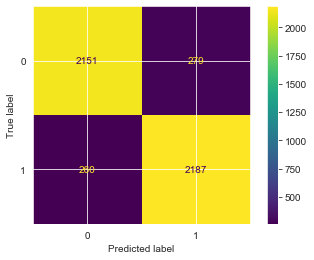

In [178]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(logreg2,X_test2,y_test2, values_format='d')
plt.show()

In [179]:
print(confusion_matrix(y_test2,pred2))

[[2151  279]
 [ 260 2187]]


In [180]:
print(classification_report(y_test2,pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2430
           1       0.89      0.89      0.89      2447

    accuracy                           0.89      4877
   macro avg       0.89      0.89      0.89      4877
weighted avg       0.89      0.89      0.89      4877



In [181]:
proba_best2 = proba_logreg2[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test2, proba_best2)
roc_auc_logreg2 = auc(fpr2,tpr2)

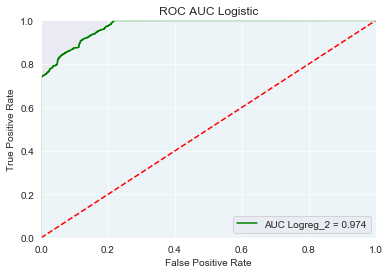

In [182]:
plt.title('ROC AUC Logistic')
plt.plot(fpr2, tpr2, 'green', label='AUC Logreg_2 = {}'.format(round(roc_auc_logreg2,3)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr2,tpr2, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')
plt.show()